In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import logging
import pandas as pd

d = {'0': 'Onderwijs',
 '1': 'Burgerrechten en vrijheden',
 '2': 'Justitie, Rechtspraak, Criminaliteit',
 '3': 'Defensie',
 '4': 'Gezondheid',
 '5': 'Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning',
 '6': 'Functioneren democratie en openbaar bestuur',
 '7': 'Macro-economie en belastingen',
 '8': 'Buitenlandse zaken en ontwikkelingssamenwerking',
 '9': 'Ondernemingen, Bankwezen en binnenlandse handel ',
 '10': 'Arbeid',
 '11': 'Verkeer en vervoer',
 '12': 'Overige',
 '13': 'sociale Zaken',
 '14': 'Immigratie en integratie',
 '15': 'Landbouw en Visserij',
 '16': 'Energiebeleid',
 '17': 'Milieu',
 '18': 'Wetenschappelijk onderzoek, technologie en communicatie'}


logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():

    def __init__(self, path_to_data, path_to_output, sample):
        self.path_to_data = path_to_data
        self.path_to_output = path_to_output
        self.sample = sample
        with open('../resources/topic_translation') as handle:
               self.translator = json.loads(handle.read())
  #      with open('../resources/numbers_to_topic.json') as handle:
   #            self.translator_numeric = json.loads(handle.read())

    def get_data_dictionary(self):
         # getting Dictionary Approach Data
        fname = '{}precision_recall_f1score_dictionary_stemmed.json'.format(self.path_to_data)
        logger.info(fname)

        with open(fname) as handle:
            dictdump =  json.loads(handle.read())

        df = pd.DataFrame.from_dict(dictdump).transpose()
        df['classifier'] = 'Albaugh et al. (Dictionary) - stemmed - index'

    
        
        fname = '{}precision_recall_f1score_dictionary_stemmed_freq.json'.format(self.path_to_data)
        logger.info(fname)

        with open(fname) as handle:
            dictdump =  json.loads(handle.read())

        df1 = pd.DataFrame.from_dict(dictdump).transpose()
        df1['classifier'] = 'Albaugh et al. (Dictionary) - stemmed - count'

        
        
        fname_notstemmed = '{}precision_recall_f1score_dictionary_not_stemmed.json'.format(self.path_to_data)
        logger.info(fname_notstemmed)

        with open(fname_notstemmed) as handle:
            dictdump =  json.loads(handle.read())

        df2 = pd.DataFrame.from_dict(dictdump).transpose()
        df2['classifier'] = 'Albaugh et al. - not stemmed - index'

        
        fname_notstemmed = '{}precision_recall_f1score_dictionary_not_stemmed_freq.json'.format(self.path_to_data)
        logger.info(fname_notstemmed)

        with open(fname_notstemmed) as handle:
            dictdump =  json.loads(handle.read())

        df3 = pd.DataFrame.from_dict(dictdump).transpose()
        df3['classifier'] = 'Albaugh et al. - not stemmed - count'

        
        df = pd.concat([df, df1, df2, df3])
        
        df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        
        return df


    def get_data_sml(self, vect):
        fname_sml = '{}sml_vectorizers_final/SML_precision_recall_f1score_text_cleaned_{}_{}.json'.format(self.path_to_data, self.sample, vect)
        fname_sml= fname_sml
        with open(fname_sml) as handle:
            class_report =  json.loads(handle.read())

        one, two, three, four = class_report
        print(four)
        one = pd.DataFrame(one).transpose()
        one['classifier'] = "Passive Agressive"
        logging.info("Results Gridsearch Passive Agressive: \n\nC: {} \nfit intercept: {} \nmax_iter: {}  \nloss: {}"
              .format(one['clf__C'][one.index=='best estimators:'] [0] ,
                      one['clf__fit_intercept'][one.index=='best estimators:'][0] ,
                      one['clf__max_iter'][one.index=='best estimators:'] [0] ,
                      one['clf__loss'][one.index=='best estimators:'][0]  )  )


        two = pd.DataFrame(two).transpose()
        two['classifier'] = "Stochastic Gradient Descent (SGD)"

        logging.info("Results Gridsearch SGD Classifier: \n\nAlpha: {} \nmax iter: {} \npenalty: {} \n\n."
              .format(two['clf__alpha'][two.index=='best estimators:'] [0] ,
                    two['clf__max_iter'][two.index=='best estimators:'][0] ,
                    two['clf__penalty'][two.index=='best estimators:'][0]) )

        three = pd.DataFrame(three).transpose()
        three['classifier'] = "Support Vector Machines (SVM)"

        logging.info("Results Gridsearch SVM Classifier: \n\nC: {} \ngamma: {} \nkernel: {} \n\n."
                      .format(three['clf__C'][three.index=='best estimators:'] [0] ,
                              three['clf__gamma'][three.index=='best estimators:'] [0] ,
                              three['clf__kernel'][three.index=='best estimators:'] [0] ))

        four = pd.DataFrame(four).transpose()
        four['classifier'] = "ExtraTrees"

        logging.info("Results Gridsearch ExtraTrees: \n\nMax features:{}".format(four['clf__max_features'][four.index=='best estimators:'] [0]  ))

        df_sml = pd.concat([one, two, three, four])
        df_sml = df_sml[['precision', 'recall', 'f1-score', 'classifier']]
        df_sml.drop(['best estimators:', 'classifier:'], inplace = True)
        #df_sml['approach'] = 'SML'
        df_sml.rename(index=self.translator, inplace=True)
        return df_sml

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml(vect='w2v_tfidf')
        df2['approach'] = 'w2v tfidf'
        df3 = self.get_data_sml(vect='tfidf')
        df3['approach'] = 'tfidf'
        df4 = self.get_data_sml(vect='w2v_count')
        df4['approach'] = 'w2v count'
        df5 = self.get_data_sml(vect='count')
        df5['approach'] = 'count'
        df = pd.concat([df1, df2, df3, df4, df5])
        df.rename(index={'Accuracy': 'Average'}, inplace=True)
        df['Policy topic'] = df.index

        #df.replace({'weighted avg': 'Accuracy'}, inplace=True)
       # df.drop(['macro avg', 'Average'], inplace = True)
        return df

a = plot_accuracy_precision_recall(path_to_data = '../output/', path_to_output = '../tables/', sample ='RPA_sample')
df = a.combine_datasets()

def get_figure_and_save():
    myanalyzer = plot_accuracy_precision_recall(path_to_data = '../output/', path_to_output = '../tables/', sample ='RPA_sample')
    df = myanalyzer.combine_datasets()
    fname = '{}classification_topics'.format('../figures/')

    df['classifier + vectorizer'] = df['classifier'].astype(str) + " ~ " + df['approach'].astype(str)
    accuracy = df[df['Policy topic'] == 'Average']
    approach = accuracy["approach"]
    colour = ['whitesmoke' if x=='w2v tfidf' else 'dimgray' if x== 'w2v count' else 'black' if x== 'count' else 'silver' if x== 'tfidf' else 'white' for x in approach ]

    final_recode = {
     'Albaugh et al. - not stemmed - index ~ Dictionary Approach' : 'Albaugh et al. - not stemmed (dictionary, index-based)' ,
     'Albaugh et al. - not stemmed - count ~ Dictionary Approach' : 'Albaugh et al. - not stemmed (dictionary, count-based)' ,            
     'Albaugh et al. (Dictionary) - stemmed - index ~ Dictionary Approach' : 'Albaugh et al. - stemmed (dictionary, index-based)' ,
     'Albaugh et al. (Dictionary) - stemmed - count ~ Dictionary Approach' : 'Albaugh et al. - stemmed (dictionary, count-based)' ,
                 
     'Support Vector Machines (SVM) ~ w2v count': 'SVM count embedding' ,
     'Support Vector Machines (SVM) ~ w2v tfidf' : 'SVM tfidf embedding' ,
     'ExtraTrees ~ count' : 'ET count',
     'ExtraTrees ~ tfidf' : 'ET tfidf',
     'ExtraTrees ~ w2v count' : 'ET count embedding',
     'Support Vector Machines (SVM) ~ tfidf' : 'SVM tfidf',
     'Support Vector Machines (SVM) ~ count' :  'SVM count',
     'ExtraTrees ~ w2v tfidf' :  'ET tfidf embedding',
     'Passive Agressive ~ tfidf' :  'PA tfidf',
     'Passive Agressive ~ count' :  'PA count',
     'Passive Agressive ~ w2v count' :  'PA count embedding',
     'Passive Agressive ~ w2v tfidf' :  'PA tfidf embedding',
     'Stochastic Gradient Descent (SGD) ~ count' :  'SGD count',
     'Stochastic Gradient Descent (SGD) ~ w2v count' : 'SGD count embedding',
     'Stochastic Gradient Descent (SGD) ~ tfidf' : 'SGD tfidf',
     'Stochastic Gradient Descent (SGD) ~ w2v tfidf' : 'SGD tfidf embedding'}

    df['classifier_updated'] = df['classifier + vectorizer'].map(final_recode)
    print(df['classifier_updated'] )
    f, ax = plt.subplots(figsize=(6,10))
    sns.set_context('talk')
    sns.set(style="whitegrid")

    order = ['Albaugh et al. - not stemmed (dictionary, index-based)', 'Albaugh et al. - not stemmed (dictionary, count-based)', 'Albaugh et al. - stemmed (dictionary, index-based)', 'Albaugh et al. - stemmed (dictionary, count-based)', 'SVM tfidf', 'SVM tfidf embedding', 'SVM count', 'SVM count embedding', 'PA tfidf', 'PA tfidf embedding', 'PA count', 'PA count embedding', 'SGD tfidf', 'SGD tfidf embedding', 'SGD count', 'SGD count embedding', 'ET tfidf', 'ET tfidf embedding', 'ET count', 'ET count embedding']

    ax = sns.barplot(y="classifier_updated", x="f1-score",edgecolor=".4", palette=colour, order =order, data=df[df['Policy topic'] == 'Average'])
    ax = sns.set_style("white")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(None)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.savefig(fname, bbox_inches = 'tight')
    print('Saved figure as: {}'.format(fname))

    sorterIndex = dict(zip(order,range(len(order))))
    # Generate a rank column that will be used to sort
    # the dataframe numerically
    df['Tm_Rank'] = df['classifier_updated'].map(sorterIndex)
    df.sort_values(['Policy topic','Tm_Rank'], inplace=True)
    df.to_csv('../output/weighted-f1-all_topics.csv')

    df = df[df['Policy topic'].isin(['Average'])]
    df.to_csv('../output/weigthed-f1-average-topics.csv')

get_figure_and_save()


2021-09-17 15:52:48,408 : INFO : ../output/precision_recall_f1score_dictionary_stemmed.json
2021-09-17 15:52:48,412 : INFO : ../output/precision_recall_f1score_dictionary_stemmed_freq.json
2021-09-17 15:52:48,415 : INFO : ../output/precision_recall_f1score_dictionary_not_stemmed.json
2021-09-17 15:52:48,419 : INFO : ../output/precision_recall_f1score_dictionary_not_stemmed_freq.json
2021-09-17 15:52:48,429 : INFO : Results Gridsearch Passive Agressive: 

C: 0.01 
fit intercept: False 
max_iter: 10  
loss: hinge
2021-09-17 15:52:48,434 : INFO : Results Gridsearch SGD Classifier: 

Alpha: 0.01 
max iter: 20 
penalty: elasticnet 

.
2021-09-17 15:52:48,442 : INFO : Results Gridsearch SVM Classifier: 

C: 10 
gamma: 0.001 
kernel: rbf 

.
2021-09-17 15:52:48,449 : INFO : Results Gridsearch ExtraTrees: 

Max features:sqrt
2021-09-17 15:52:48,469 : INFO : Results Gridsearch Passive Agressive: 

C: 0.5 
fit intercept: True 
max_iter: 10  
loss: hinge
2021-09-17 15:52:48,477 : INFO : Results G

{'Functioneren democratie en openbaar bestuur': {'precision': 0.6790123456790124, 'recall': 0.4700854700854701, 'f1-score': 0.5555555555555555, 'support': 117}, 'weighted avg': {'precision': 0.5317212128477621, 'recall': 0.49466192170818507, 'f1-score': 0.5043006779234309, 'support': 562}, 'Gezondheid': {'precision': 0.6984126984126984, 'recall': 0.6875, 'f1-score': 0.6929133858267716, 'support': 64}, 'Defensie': {'precision': 0.3076923076923077, 'recall': 0.5, 'f1-score': 0.380952380952381, 'support': 16}, 'sociale Zaken': {'precision': 0.14285714285714285, 'recall': 0.6, 'f1-score': 0.23076923076923073, 'support': 5}, 'Milieu': {'precision': 0.18181818181818182, 'recall': 0.3076923076923077, 'f1-score': 0.2285714285714286, 'support': 13}, 'best estimators:': {'clf__max_features': 'sqrt'}, 'Overige': {'precision': 0.5462184873949579, 'recall': 0.5, 'f1-score': 0.5220883534136547, 'support': 130}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.40476190476190477, 're

In [10]:
df['classifier + vectorizer'].unique()

array(['Albaugh et al. (Dictionary) - stemmed - index ~ Dictionary Approach',
       'Albaugh et al. (Dictionary) - stemmed - count ~ Dictionary Approach',
       'Albaugh et al. - not stemmed - index ~ Dictionary Approach',
       'Albaugh et al. - not stemmed - count ~ Dictionary Approach',
       'Passive Agressive ~ w2v tfidf',
       'Stochastic Gradient Descent (SGD) ~ w2v tfidf',
       'Support Vector Machines (SVM) ~ w2v tfidf',
       'ExtraTrees ~ w2v tfidf', 'Passive Agressive ~ tfidf',
       'Stochastic Gradient Descent (SGD) ~ tfidf',
       'Support Vector Machines (SVM) ~ tfidf', 'ExtraTrees ~ tfidf',
       'Passive Agressive ~ w2v count',
       'Stochastic Gradient Descent (SGD) ~ w2v count',
       'Support Vector Machines (SVM) ~ w2v count',
       'ExtraTrees ~ w2v count', 'Passive Agressive ~ count',
       'Stochastic Gradient Descent (SGD) ~ count',
       'Support Vector Machines (SVM) ~ count', 'ExtraTrees ~ count'],
      dtype=object)

2021-09-17 16:01:00,537 : INFO : ../output/precision_recall_f1score_dictionary_stemmed.json
2021-09-17 16:01:00,541 : INFO : ../output/precision_recall_f1score_dictionary_stemmed_freq.json
2021-09-17 16:01:00,544 : INFO : ../output/precision_recall_f1score_dictionary_not_stemmed.json
2021-09-17 16:01:00,548 : INFO : ../output/precision_recall_f1score_dictionary_not_stemmed_freq.json
2021-09-17 16:01:00,563 : INFO : Results Gridsearch Passive Agressive: 

C: 0.01 
fit intercept: False 
max_iter: 10  
loss: hinge
2021-09-17 16:01:00,570 : INFO : Results Gridsearch SGD Classifier: 

Alpha: 0.01 
max iter: 20 
penalty: elasticnet 

.
2021-09-17 16:01:00,575 : INFO : Results Gridsearch SVM Classifier: 

C: 10 
gamma: 0.001 
kernel: rbf 

.
2021-09-17 16:01:00,581 : INFO : Results Gridsearch ExtraTrees: 

Max features:sqrt
2021-09-17 16:01:00,599 : INFO : Results Gridsearch Passive Agressive: 

C: 0.5 
fit intercept: True 
max_iter: 10  
loss: hinge
2021-09-17 16:01:00,605 : INFO : Results G

{'Functioneren democratie en openbaar bestuur': {'precision': 0.6790123456790124, 'recall': 0.4700854700854701, 'f1-score': 0.5555555555555555, 'support': 117}, 'weighted avg': {'precision': 0.5317212128477621, 'recall': 0.49466192170818507, 'f1-score': 0.5043006779234309, 'support': 562}, 'Gezondheid': {'precision': 0.6984126984126984, 'recall': 0.6875, 'f1-score': 0.6929133858267716, 'support': 64}, 'Defensie': {'precision': 0.3076923076923077, 'recall': 0.5, 'f1-score': 0.380952380952381, 'support': 16}, 'sociale Zaken': {'precision': 0.14285714285714285, 'recall': 0.6, 'f1-score': 0.23076923076923073, 'support': 5}, 'Milieu': {'precision': 0.18181818181818182, 'recall': 0.3076923076923077, 'f1-score': 0.2285714285714286, 'support': 13}, 'best estimators:': {'clf__max_features': 'sqrt'}, 'Overige': {'precision': 0.5462184873949579, 'recall': 0.5, 'f1-score': 0.5220883534136547, 'support': 130}, 'Buitenlandse zaken en ontwikkelingssamenwerking': {'precision': 0.40476190476190477, 're

2021-09-17 16:01:00,823 : WARNING : No handles with labels found to put in legend.


Saved figure as: ../figures/classification_topics


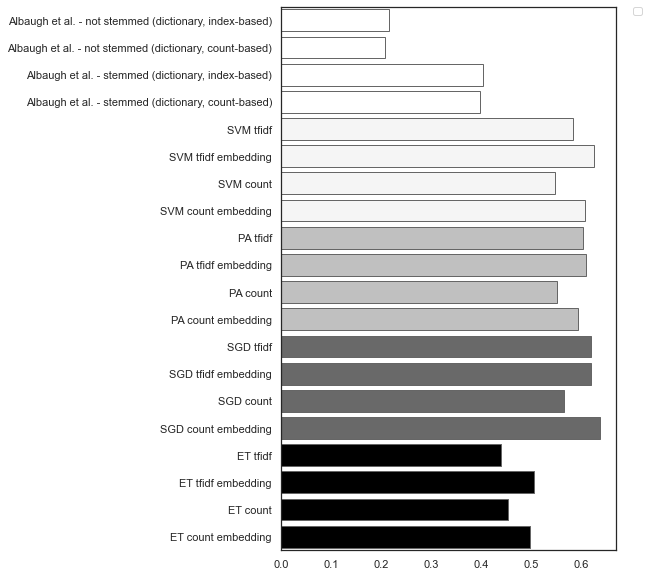

In [13]:
def get_figure_and_save():
    myanalyzer = plot_accuracy_precision_recall(path_to_data = '../output/', path_to_output = '../tables/', sample ='RPA_sample')
    df = myanalyzer.combine_datasets()
    fname = '{}classification_topics'.format('../figures/')

    df['classifier + vectorizer'] = df['classifier'].astype(str) + " ~ " + df['approach'].astype(str)
    accuracy = df[df['Policy topic'] == 'Average']
    approach = accuracy["approach"]
    colour = ['whitesmoke' if x=='w2v tfidf' else 'dimgray' if x== 'w2v count' else 'black' if x== 'count' else 'silver' if x== 'tfidf' else 'white' for x in approach ]

    final_recode = {
     'Albaugh et al. - not stemmed - index ~ Dictionary Approach' : 'Albaugh et al. - not stemmed (dictionary, index-based)' ,
     'Albaugh et al. - not stemmed - count ~ Dictionary Approach' : 'Albaugh et al. - not stemmed (dictionary, count-based)' ,            
     'Albaugh et al. (Dictionary) - stemmed - index ~ Dictionary Approach' : 'Albaugh et al. - stemmed (dictionary, index-based)' ,
     'Albaugh et al. (Dictionary) - stemmed - count ~ Dictionary Approach' : 'Albaugh et al. - stemmed (dictionary, count-based)' ,
                 
     'Support Vector Machines (SVM) ~ w2v count': 'SVM count embedding' ,
     'Support Vector Machines (SVM) ~ w2v tfidf' : 'SVM tfidf embedding' ,
     'ExtraTrees ~ count' : 'ET count',
     'ExtraTrees ~ tfidf' : 'ET tfidf',
     'ExtraTrees ~ w2v count' : 'ET count embedding',
     'Support Vector Machines (SVM) ~ tfidf' : 'SVM tfidf',
     'Support Vector Machines (SVM) ~ count' :  'SVM count',
     'ExtraTrees ~ w2v tfidf' :  'ET tfidf embedding',
     'Passive Agressive ~ tfidf' :  'PA tfidf',
     'Passive Agressive ~ count' :  'PA count',
     'Passive Agressive ~ w2v count' :  'PA count embedding',
     'Passive Agressive ~ w2v tfidf' :  'PA tfidf embedding',
     'Stochastic Gradient Descent (SGD) ~ count' :  'SGD count',
     'Stochastic Gradient Descent (SGD) ~ w2v count' : 'SGD count embedding',
     'Stochastic Gradient Descent (SGD) ~ tfidf' : 'SGD tfidf',
     'Stochastic Gradient Descent (SGD) ~ w2v tfidf' : 'SGD tfidf embedding'}

    df['classifier_updated'] = df['classifier + vectorizer'].map(final_recode)
    print(df['classifier_updated'] )
    f, ax = plt.subplots(figsize=(6,10))
    sns.set_context('talk')
    sns.set(style="whitegrid")

    order = ['Albaugh et al. - not stemmed (dictionary, index-based)', 'Albaugh et al. - not stemmed (dictionary, count-based)', 'Albaugh et al. - stemmed (dictionary, index-based)', 'Albaugh et al. - stemmed (dictionary, count-based)', 'SVM tfidf', 'SVM tfidf embedding', 'SVM count', 'SVM count embedding', 'PA tfidf', 'PA tfidf embedding', 'PA count', 'PA count embedding', 'SGD tfidf', 'SGD tfidf embedding', 'SGD count', 'SGD count embedding', 'ET tfidf', 'ET tfidf embedding', 'ET count', 'ET count embedding']

    ax = sns.barplot(y="classifier_updated", x="f1-score",edgecolor=".4", palette=colour, order =order, data=df[df['Policy topic'] == 'Average'])
    ax = sns.set_style("white")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(None)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.savefig(fname, bbox_inches = 'tight')
    print('Saved figure as: {}'.format(fname))

    sorterIndex = dict(zip(order,range(len(order))))
    # Generate a rank column that will be used to sort
    # the dataframe numerically
    df['Tm_Rank'] = df['classifier_updated'].map(sorterIndex)
    df.sort_values(['Policy topic','Tm_Rank'], inplace=True)
    df.to_csv('../output/weighted-f1-all_topics.csv')

    df = df[df['Policy topic'].isin(['Average'])]
    df.to_csv('../output/weigthed-f1-average-topics.csv')

get_figure_and_save()
